In [1]:
#I'm going to cluster based on sepal length and width
#Importing relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
from sklearn.cluster import KMeans

In [2]:
#Reading the file
data = pd.read_csv('iris_dataset.csv')

In [3]:
#Looking at the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<function matplotlib.pyplot.show(*args, **kw)>

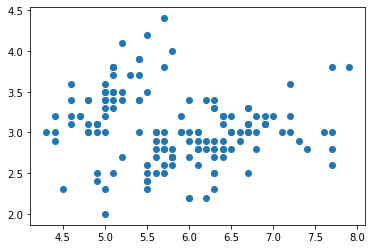

In [4]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.show

In [5]:
x = data.iloc[:,0:2]#Keeps all rows but only 1st and 2nd columns

In [6]:
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
#Use the WCSS(Within-cluster sum of squares-distance between the sum squared)
#As well of number of clusters trying to minimize both
#Elbow method is when you see an elbow on the graph but if can't tell may be good to try multiple solutions


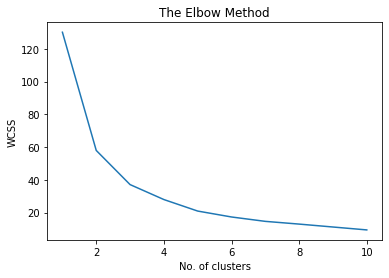

In [8]:
#Does a cluster with 1-11 cluster and will measure WCSS and append to list
def elbow_method(data): 
    global wcss
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(i)
        kmeans.fit(data)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
        
    #Plots the WCSS against the number of clusters
    number_clusters = range(1,11)
    plt.plot(number_clusters,wcss)
    plt.title('The Elbow Method')
    plt.xlabel('No. of clusters')
    plt.ylabel('WCSS')

elbow_method(x)

Text(0, 0.5, 'WCSS')

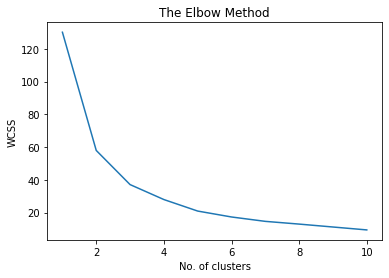

In [9]:
#Plots the WCSS against the number of clusters
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [10]:
#I would use the 3 cluster solution because from 2 to 3 there's still a lot to gain
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#Copies table x into clusters but adds a new column that details the cluster...
#a point is in
clusters = x.copy()
clusters['predictions']=kmeans.fit_predict(x)
clusters

,sepal_length,sepal_width,predictions
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


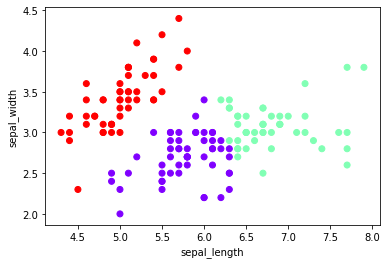

In [12]:
#Graphing the 3 clusters
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['predictions'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [13]:
#Sepal length may have more havily influenced clustering as it is a bigger...
#numerical value so I'll repeat the previous methodology nut first ...
#clustering the data to se if it makes a difference using sklearn
from sklearn import preprocessing
x_scaled= preprocessing.scale(x)

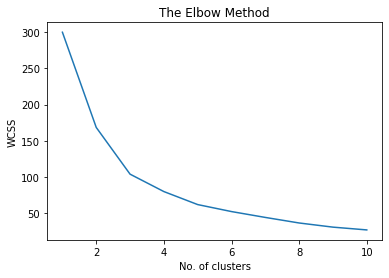

In [14]:
#Now mean 0 and standard deviation of 1 so they should both weight the clustering the same
elbow_method(x_scaled)

In [15]:
#Again the drop from 2 to 3 and lack of drop from 3 to 4 suggests 3 is a god...
#number of clusters and showing that...
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#Showing the graph with original predictions and with scaled data and they...
#appear the same in the 10 shown so standardisation may not have made much of...
#a difference
clusters['scaled_pred']=kmeans_new.fit_predict(x_scaled)
clusters

,sepal_length,sepal_width,predictions,scaled_pred
0,5.1,3.5,2,1
1,4.9,3.0,2,1
2,4.7,3.2,2,1
3,4.6,3.1,2,1
4,5.0,3.6,2,1
...,...,...,...,...
145,6.7,3.0,1,2
146,6.3,2.5,0,0
147,6.5,3.0,1,2
148,6.2,3.4,1,2


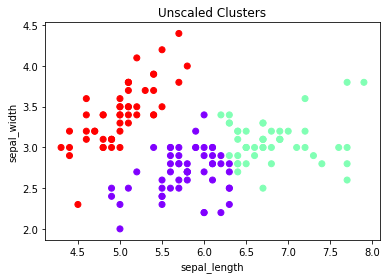

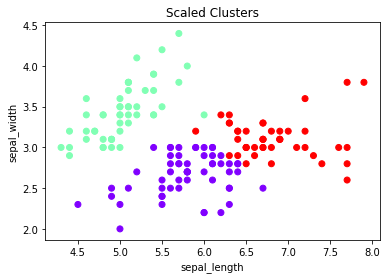

In [17]:
#Plotting new clusters and old
plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['predictions'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Unscaled Clusters')
plt.show()

plt.scatter(clusters['sepal_length'],clusters['sepal_width'],c=clusters['scaled_pred'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scaled Clusters')
plt.show()

In [18]:
#After standardisation clusters are almost identical but it has some slight differences